# Neural Networks Assignment (Graded)

Welcome to your first (required) programming assignment! You will build a Neural Network to recognize various everyday objects. This assignment will step you through how to do this with a Neural Network mindset, and will also hone your intuitions about deep learning.

**Instructions:**
* Do not modify any of the codes.
* Only write code when prompted. For example in some sections you will find the following,
```
# YOUR CODE GOES HERE
# YOUR CODE STARTS HERE
# ToDo
```
Only modify those sections of the code.

**You will learn to:**
* Explore the CIFAR10 dataset: https://www.cs.toronto.edu/~kriz/cifar.html
* Build the general architecture of a neural network, including:
  * Initializing parameters
  * Calculating the cost function and its gradient
  * Using an optimization algorithm (gradient descent)
* Gather all three functions above into a main model function, in the right order.

In [ ]:
import tensorflow as tf
import numpy as np

from helpers import *

In [ ]:
# Import dataset
from tensorflow.keras.datasets import cifar10

# Load dataset into training and testing sets
(X_train, y_train), (X_test, y_test) = cifar10.load_data()


## Visualizing the dataset

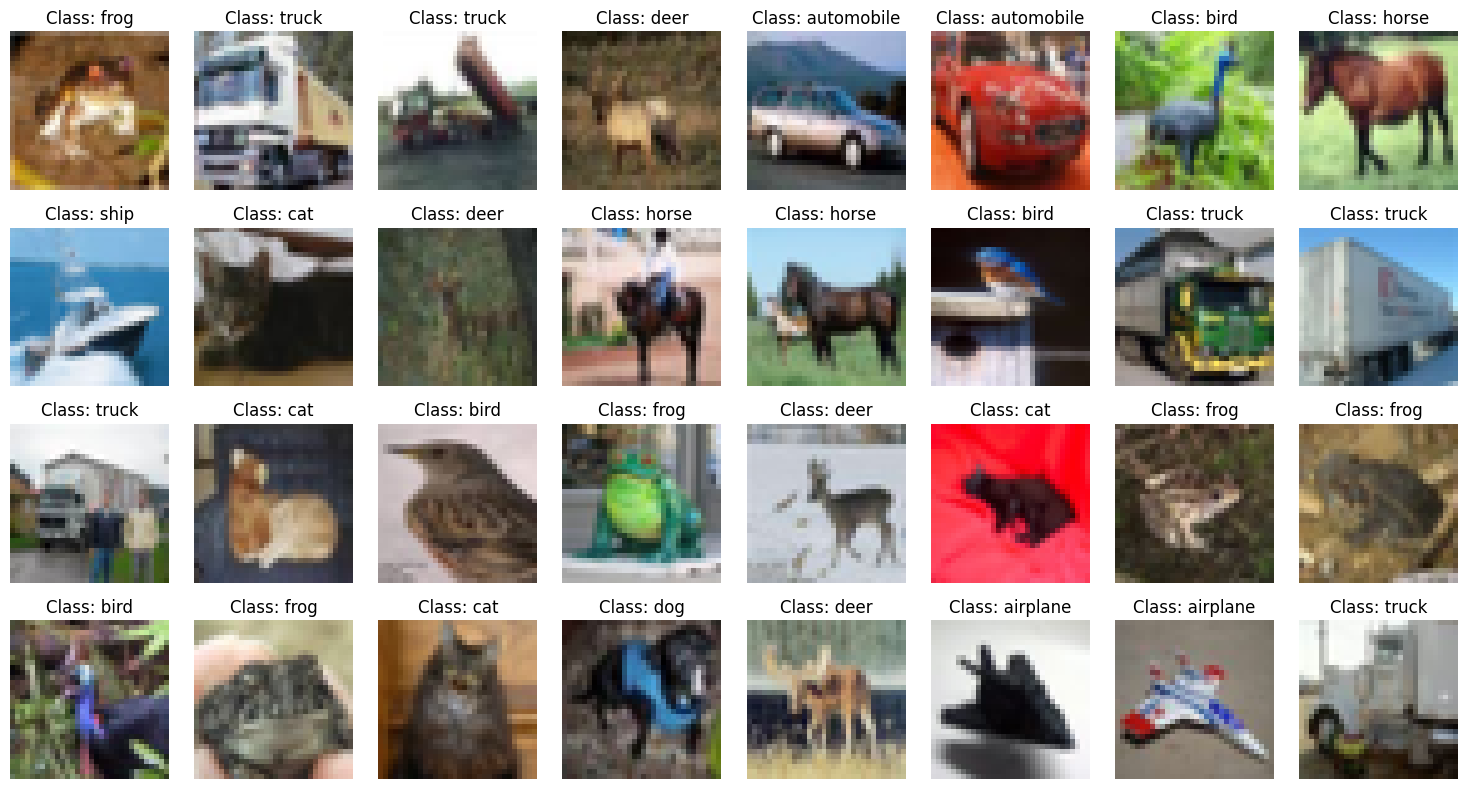

In [ ]:
import matplotlib.pyplot as plt

# Visualize a grid of images from the training set
display_image_grid(X_train[:32], y_train[:32])


#### How many images does the training dataset contain?


In [ ]:
# YOUR CODE GOES HERE
len(X_train)

50000


**Expected Output:**
```
50000
```



#### How many images does the testing dataset contain?


In [ ]:
# YOUR CODE GOES HERE
len(X_test)

10000


**Expected Output:**
```
10000
```



#### How many output classes does the dataset contain? Can you list them?

In [ ]:
# YOUR CODE GOES HERE
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

**Expected Output:**
```
array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)
```

#### Find out the total number of images in each class.

In [ ]:
# ToDo

num_classes = len(np.unique(y_train))
for cls in range(num_classes):
  count = 0
  # YOUR CODE GOES HERE
  for label in y_train:
    if label == cls:
      count += 1

  print("Number of images belonging to {} is {}".format(cls, count))

Number of images belonging to 0 is 5000
Number of images belonging to 1 is 5000
Number of images belonging to 2 is 5000
Number of images belonging to 3 is 5000
Number of images belonging to 4 is 5000
Number of images belonging to 5 is 5000
Number of images belonging to 6 is 5000
Number of images belonging to 7 is 5000
Number of images belonging to 8 is 5000
Number of images belonging to 9 is 5000


**Expected Output:**
```
Number of images belonging to 0 is 5000
Number of images belonging to 1 is 5000
Number of images belonging to 2 is 5000
Number of images belonging to 3 is 5000
Number of images belonging to 4 is 5000
Number of images belonging to 5 is 5000
Number of images belonging to 6 is 5000
Number of images belonging to 7 is 5000
Number of images belonging to 8 is 5000
Number of images belonging to 9 is 5000
```



---



# Preprocessing the dataset
We shall be performing the following steps to preprocess our dataset in order to get the highest possible model performance:

1. **Normalization:** Scaling down the pixel values between 0 to 1.
2. **Flattening:** Flattenning the dataset such that the shape of the image (num_px, num_px, 3) are flattened into single vectors of shape (num_px
 num_px
 3, 1).
3. **One Hot Encoding:** Encoding the values into a one hot vector.

In [ ]:
# TODO

def data_preprocessing(X_train, X_test, y_train, y_test):

  """Preprocesses the training and testing data for a machine learning model.

  Args:
      X_train: Training dataset features.
      X_test: Testing dataset features.
      y_train: Training dataset labels.
      y_test: Testing dataset labels.

  Returns:
      X_train: Preprocessed training dataset features.
      X_test: Preprocessed testing dataset features.
      y_train: Preprocessed training dataset labels.
      y_test: Preprocessed testing dataset labels.

  """

  # Data Normalization
  # YOUR CODE GOES HERE
  X_train = X_train.astype('float32') / 255
  X_test = X_test.astype('float32') / 255

  assert np.isclose(X_train.mean(), 0.4733649)
  assert np.isclose(X_test.mean(), 0.47658524)

  # Flattening
  # YOUR CODE GOES HERE
  X_train = X_train.reshape(X_train.shape[0], -1)
  X_test = X_test.reshape(X_test.shape[0], -1)

  # One Hot Encoding
  # YOUR CODE GOES HERE
  y_train_oh = tf.keras.utils.to_categorical(y_train, 10)
  y_test_oh = tf.keras.utils.to_categorical(y_test, 10)

  return X_train, X_test, y_train_oh, y_test_oh



# Model Building

Here, you shall be building a feedforward neural network with atleast 3 hidden neurons.

In [ ]:
# TODO

# Import necessary modules and add atleast 3 layers to the network
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential

def build_model(input_shape, num_classes):
    """Builds a feedforward neural network model.

    Args:
        input_shape: Tuple specifying the input shape.
        num_classes: Number of output classes.

    Returns:
        Compiled Keras model.
    """
    model = Sequential()
    model.add(Input(input_shape))

    # Add at least 3 hidden layers with 'relu' activation function
    # Also ensure that the final layer has 10 neurons
    # YOUR CODE GOES HERE

    model.add(Dense(512, activation='relu'))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))

    model.add(Dense(10, activation='softmax'))

    test_model_structure(model)
    return model

# Model Training and Evaluation



In [ ]:
np.random.seed(43)  # for reproducibility
tf.random.set_seed(43)  # for reproducibility

In [ ]:
def compile_model(model):
    model.compile(loss='categorical_crossentropy',
                      optimizer=Adam(),
                      metrics=['accuracy'])

In [ ]:
# TODO

def train_model(x_train, y_train, model, epochs, val_split, batch_sz):
    """Trains the model using the provided training data.

    Args:
        x_train: Training dataset features.
        y_train: Training dataset labels.
        model (tf.keras.Model): The compiled neural network model.
        epochs (int, optional): Number of epochs to train the model. Defaults to 10.
        val_split (float, optional): Fraction of the training data to be used as validation data. Defaults to 0.2.

    Returns:
        tf.keras.callbacks.History: The training history object.
    """
    # Write your code here: Define the hyperparameters and train the model, modify the fit method below as per the hyperparameters
    device = detect_and_set_device()
    with tf.device('/' + device + ':0'):

        history = model.fit(
            # YOUR CODE GOES HERE

            x_train, y_train,
            epochs=epochs,
            batch_size=batch_sz,
            validation_split=val_split,
        )

    return history

# Training and evaluation

In [ ]:
 # TODO

#  def main(epochs, val_split, batch_sz):
"""Main function to run the training pipeline.

  Args:
      epochs(int, optional): Number of epochs to train the model.
      val_split: Fraction of the training data to be used as validation data.
      batch_sz: Batch size for training.
      y_train: Training dataset labels.

  Returns:
      None

"""

x_train, x_test, y_train_oh, y_test_oh = data_preprocessing(X_train, X_test, y_train, y_test)

model = build_model(input_shape=(3072,), num_classes=10)
compile_model(model)
history = train_model(x_train, y_train_oh, model, epochs=3, val_split=0.2, batch_sz=32)

test_loss, test_acc = model.evaluate(x_test, y_test_oh)
print('Test accuracy:', test_acc)

y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test_oh, axis=1)



# if __name__ == "__main__":
#     main(epochs=3, val_split=0.2, batch_sz=32)

GPU is not available. Using CPU.
Epoch 1/3
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 34s 25ms/step - accuracy: 0.2387 - loss: 2.0468 - val_accuracy: 0.3395 - val_loss: 1.8048
Epoch 2/3
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 40s 25ms/step - accuracy: 0.3564 - loss: 1.7711 - val_accuracy: 0.3770 - val_loss: 1.7222
Epoch 3/3
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 32s 26ms/step - accuracy: 0.3900 - loss: 1.6859 - val_accuracy: 0.3992 - val_loss: 1.6754
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4150 - loss: 1.6262
Test accuracy: 0.40869998931884766
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


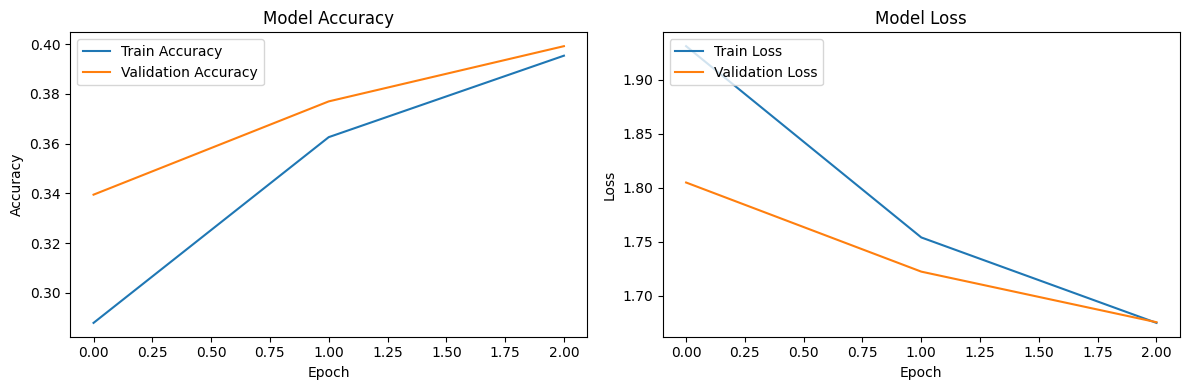

TypeError: plot_predictions() got multiple values for argument 'num_samples'

In [ ]:
# Plots
plot_metrics(history)
plot_predictions(X_test, y_true, y_pred, num_samples=16)
plot_label_comparison(y_true, y_pred)